In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/soham/Downloads/clustering.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


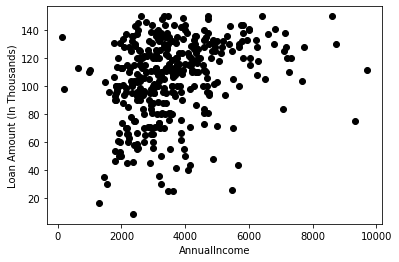

In [2]:
X = df.loc[:,["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

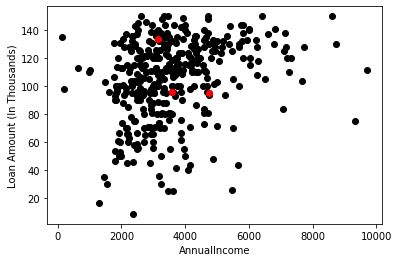

In [3]:

# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K,random_state=5))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [4]:
# Values of initial centroids
Centroids

,LoanAmount,ApplicantIncome
184,134.0,3153
321,96.0,3583
53,95.0,4755


In [5]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[] 
        #ED is the List of Euclidean Distances of a centroid from all the rows of df
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED #create a new column in X for each centroid, each row contains euc_dist of centroid  from that row 
        i=i+1
    
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'].sum() - Centroids['LoanAmount'].sum()) + (Centroids_new['ApplicantIncome'].sum() - Centroids['ApplicantIncome'].sum())
        print(diff)
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

133.92222877391356
271.1421578194526
192.20051157892965
219.4900978982597
198.91365951784132
52.84741626127732
98.54724443834323
90.64953219227573
18.274686272278586
9.210239940833844
18.345487493007
46.27013250786143
0.0


In [6]:
X

,LoanAmount,ApplicantIncome,1,2,3,Cluster
0,128.0,4583,2085.250941,549.706662,1929.786213,2
1,66.0,3000,503.013025,1034.521934,3513.174648,1
2,120.0,2583,87.961117,1450.632322,3929.767475,1
3,141.0,6000,3502.297968,1966.652040,513.218472,3
4,95.0,2333,164.991055,1700.660175,4179.839177,1
5,70.0,3200,702.564810,834.543660,3313.137067,1
6,109.0,2500,11.704412,1533.596340,4012.781149,1
7,114.0,1853,645.184252,2180.600283,4659.770674,1
8,17.0,1299,1201.670067,2736.168832,5214.774665,1
9,125.0,4950,2452.181985,916.530619,1562.777161,2


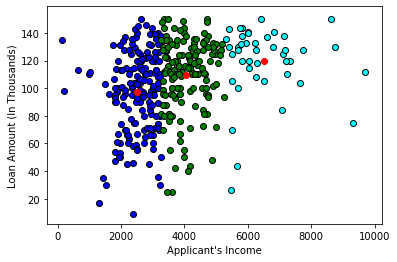

In [7]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k], edgecolor='k')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel("Applicant's Income")
plt.ylabel('Loan Amount (In Thousands)')
plt.show()